In [15]:
import pandas as pd
import datetime as dt

In [2]:
file_to_read = 'CTA_list_of_L_stops.csv'
l_stops_df = pd.read_csv(file_to_read)
l_stops_df.dtypes

STOP_ID                      int64
DIRECTION_ID                object
STOP_NAME                   object
STATION_NAME                object
STATION_DESCRIPTIVE_NAME    object
MAP_ID                       int64
ADA                           bool
RED                           bool
BLUE                          bool
G                             bool
BRN                           bool
P                             bool
Pexp                          bool
Y                             bool
Pnk                           bool
O                             bool
Location                    object
dtype: object

In [3]:
station_bools =l_stops_df[['MAP_ID','ADA','RED','BLUE','G','BRN','P','Pexp','Y','Pnk','O']
].groupby('MAP_ID').any()
l_stops_df = l_stops_df.drop(['STOP_ID', 'DIRECTION_ID', 'STOP_NAME',
'ADA','RED','BLUE','G','BRN','P','Pexp','Y','Pnk','O'], axis=1) \
    .merge(station_bools, how='left', left_on='MAP_ID',
right_index=True).drop_duplicates()

In [4]:
print(station_bools)

          ADA    RED   BLUE      G    BRN      P   Pexp      Y    Pnk      O
MAP_ID                                                                      
40010   False  False   True  False  False  False  False  False  False  False
40020    True  False  False   True  False  False  False  False  False  False
40030    True  False  False   True  False  False  False  False  False  False
40040   False  False  False  False   True  False   True  False   True   True
40050    True  False  False  False  False   True   True  False  False  False
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
41660    True   True  False  False  False  False  False  False  False  False
41670    True  False  False   True  False  False  False  False  False  False
41680    True  False  False  False  False  False  False   True  False  False
41690    True  False  False   True  False  False  False  False  False  False
41700    True  False  False   True   True  False   True  False   True   True

In [5]:
l_stops_df[['latitude','longitude']] = l_stops_df['Location'].str.replace('\(|\)','',
regex=True).str.split(',',expand=True).apply(pd.to_numeric)

In [6]:
l_stops_df.head(4)

,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,latitude,longitude
0,18th,18th (Pink Line),40830,"(41.857908, -87.669147)",True,False,False,False,False,False,False,False,True,False,41.857908,-87.669147
2,35th/Archer,35th/Archer (Orange Line),40120,"(41.829353, -87.680622)",True,False,False,False,False,False,False,False,False,True,41.829353,-87.680622
4,35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,"(41.831677, -87.625826)",True,False,False,True,False,False,False,False,False,False,41.831677,-87.625826
6,43rd,43rd (Green Line),41270,"(41.816462, -87.619021)",True,False,False,True,False,False,False,False,False,False,41.816462,-87.619021


In [7]:
ridership_df = pd.read_csv('CTA_ridership_daily_totals.csv')

df = pd.merge(ridership_df, l_stops_df, how='left', left_on='station_id',
right_on='MAP_ID')

In [8]:
df.head(4)

,station_id,stationname,date,daytype,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,...,BLUE,G,BRN,P,Pexp,Y,Pnk,O,latitude,longitude
0,41280,Jefferson Park,12/22/2017,W,6104,Jefferson Park,Jefferson Park (Blue Line),41280.0,"(41.970634, -87.760892)",True,...,True,False,False,False,False,False,False,False,41.970634,-87.760892
1,41000,Cermak-Chinatown,12/18/2017,W,3636,Cermak-Chinatown,Cermak-Chinatown (Red Line),41000.0,"(41.853206, -87.630968)",True,...,False,False,False,False,False,False,False,False,41.853206,-87.630968
2,40280,Central-Lake,12/02/2017,A,1270,Central,Central (Green Line),40280.0,"(41.887389, -87.76565)",True,...,False,True,False,False,False,False,False,False,41.887389,-87.765650
3,40140,Dempster-Skokie,12/19/2017,W,1759,Dempster-Skokie,Dempster-Skokie (Yellow Line),40140.0,"(42.038951, -87.751919)",True,...,False,False,False,False,False,True,False,False,42.038951,-87.751919


In [11]:
df['south_side'] = df['latitude'] < 41.881
df[['south_side','rides']].groupby('south_side').mean()

,rides
south_side,
False,3605.108521
True,2710.223723


In [17]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(4)

,station_id,stationname,date,daytype,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,...,BRN,P,Pexp,Y,Pnk,O,latitude,longitude,south_side,year
0,41280,Jefferson Park,12/22/2017,W,6104,Jefferson Park,Jefferson Park (Blue Line),41280.0,"(41.970634, -87.760892)",True,...,False,False,False,False,False,False,41.970634,-87.760892,False,2017
1,41000,Cermak-Chinatown,12/18/2017,W,3636,Cermak-Chinatown,Cermak-Chinatown (Red Line),41000.0,"(41.853206, -87.630968)",True,...,False,False,False,False,False,False,41.853206,-87.630968,True,2017
2,40280,Central-Lake,12/02/2017,A,1270,Central,Central (Green Line),40280.0,"(41.887389, -87.76565)",True,...,False,False,False,False,False,False,41.887389,-87.765650,False,2017
3,40140,Dempster-Skokie,12/19/2017,W,1759,Dempster-Skokie,Dempster-Skokie (Yellow Line),40140.0,"(42.038951, -87.751919)",True,...,False,False,False,True,False,False,42.038951,-87.751919,False,2017


,north,south
year,,
2001,3256.290171,2496.323836
2002,3252.311226,2512.460137
2003,3235.101771,2442.602009
2004,3185.833367,2399.780556
2005,3325.644838,2531.991187
2006,3460.941029,2665.765571
2007,3273.962713,2735.778128
2008,3395.385912,2886.541029
2009,3556.276152,2829.410320


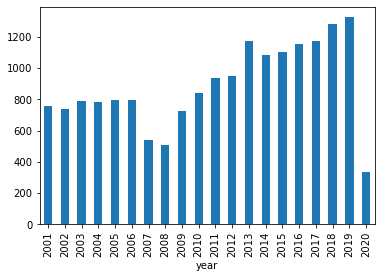

In [24]:
rides_by_sides = df[['year','south_side','rides']] \
    .groupby(['year','south_side']).mean() \
    .reset_index() \
    .pivot(index='year',columns='south_side',values='rides')
rides_by_sides.columns = ['north','south']
(rides_by_sides['north'] - rides_by_sides['south']).plot(kind='bar')
rides_by_sides

In [25]:
df.head(4)

,station_id,stationname,date,daytype,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,...,BRN,P,Pexp,Y,Pnk,O,latitude,longitude,south_side,year
0,41280,Jefferson Park,12/22/2017,W,6104,Jefferson Park,Jefferson Park (Blue Line),41280.0,"(41.970634, -87.760892)",True,...,False,False,False,False,False,False,41.970634,-87.760892,False,2017
1,41000,Cermak-Chinatown,12/18/2017,W,3636,Cermak-Chinatown,Cermak-Chinatown (Red Line),41000.0,"(41.853206, -87.630968)",True,...,False,False,False,False,False,False,41.853206,-87.630968,True,2017
2,40280,Central-Lake,12/02/2017,A,1270,Central,Central (Green Line),40280.0,"(41.887389, -87.76565)",True,...,False,False,False,False,False,False,41.887389,-87.765650,False,2017
3,40140,Dempster-Skokie,12/19/2017,W,1759,Dempster-Skokie,Dempster-Skokie (Yellow Line),40140.0,"(42.038951, -87.751919)",True,...,False,False,False,True,False,False,42.038951,-87.751919,False,2017


In [29]:
df.groupby('station_id').count()

,stationname,date,daytype,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,Location,ADA,RED,...,BRN,P,Pexp,Y,Pnk,O,latitude,longitude,south_side,year
station_id,,,,,,,,,,,,,,,,,,,,,
40010,7277,7277,7277,7277,7277,7277,7277,7277,7277,7277,...,7277,7277,7277,7277,7277,7277,7277,7277,7277,7277
40020,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,...,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276
40030,7281,7281,7281,7281,7281,7281,7281,7281,7281,7281,...,7281,7281,7281,7281,7281,7281,7281,7281,7281,7281
40040,7285,7285,7285,7285,7285,7285,7285,7285,7285,7285,...,7285,7285,7285,7285,7285,7285,7285,7285,7285,7285
40050,7275,7275,7275,7275,7275,7275,7275,7275,7275,7275,...,7275,7275,7275,7275,7275,7275,7275,7275,7275,7275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41660,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,...,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276
41670,7123,7123,7123,7123,7123,7123,7123,7123,7123,7123,...,7123,7123,7123,7123,7123,7123,7123,7123,7123,7123
41680,3166,3166,3166,3166,3166,3166,3166,3166,3166,3166,...,3166,3166,3166,3166,3166,3166,3166,3166,3166,3166


In [31]:
len(df['station_id'].unique())

147

In [39]:
import pandas as pd
import re

dracula_df = pd.read_csv('dracula.txt', sep='\n', header=None)
dracula_df.columns = ['text']

p = "^vampire:(\W*)"
#dracula_df['text'].str.extractall(p, flags=re.I)[0].value_counts()
dracula_df['text'].str.extractall(p, flags=re.I)[0]


#import re
#s = "hi my name is ryan, and i am new to python and would like to learn more"
#m = re.search("^name: (\w+)", s)
#print m.groups()

Series([], Name: 0, dtype: object)

In [38]:
import re
s = "hi my name is ryan, and i am new to python and would like to learn more"
m = re.search("^name: (\w+)", s)
print (m)

None
